## Problem Statement

#### 2019 Iowa Liquor Sales

This data contains the spirits purchase information of Iowa Class “E” liquor licensees by product and date of purchase for calendar year 2019. Need to explore the data and analyse the current market for liquor sales.


### Data Dictionary

| #  | Column Name           | Description                                                                                       | Type        |
|----|-----------------------|---------------------------------------------------------------------------------------------------|-------------|
| 1  | Invoice/Item          | Number Concatenated invoice and line number associated with the liquor order                      | Plain Text  |
| 2  | Date                  | Date of order                                                                                     | Date & Time |
| 3  | Store Number          | Unique number assigned to the store who ordered the liquor                                        | Plain Text  |
| 4  | Store Name            | Name of store who ordered the liquor                                                              | Plain Text  |
| 5  | Address               | Address of store who ordered the liquor                                                           | Plain Text  |
| 6  | City                  | City where the store who ordered the liquor is located                                            | Plain Text  |
| 7  | Zip Code              | Zip code where the store who ordered the liquor is located                                        | Plain Text  |
| 8  | Store Location        | The Address, City, State and Zip Code are geocoded to provide geographic coordinates              | Point       |
| 9  | County Number         | Iowa county number for the county where store who ordered the liquor is located                   | Plain Text  |
| 10 | County                | County where the store who ordered the liquor is located                                          | Plain Text  |
| 11 | Category              | Category code associated with the liquor ordered                                                  | Plain Text  |
| 12 | Category Name         | Category of the liquor ordered                                                                    | Plain Text  |
| 13 | Vendor Number         | The vendor number of the company for the brand of liquor ordered                                  | Plain Text  |
| 14 | Vendor Name           | The vendor name of the company for the brand of liquor ordered                                    | Plain Text  |
| 15 | Item Number           | Item number for the individual liquor product ordered.                                            | Plain Text  |
| 16 | Item Description      | Description of the individual liquor product ordered                                              | Plain Text  |
| 17 | Pack                  | The number of bottles in a case for the liquor ordered                                            | Number      |
| 18 | Bottle Volume (ml)    | Volume of each liquor bottle ordered in milliliters                                               | Number      |
| 19 | State Bottle Cost     | The amount that Alcoholic Beverages Division paid for each bottle of liquor ordered               | Number      |
| 20 | State Bottle Retail   | The amount the store paid for each bottle of liquor ordered                                       | Number      |
| 21 | Bottles Sold          | The number of bottles of liquor ordered by the store                                              | Number      |
| 22 | Sale (Dollars)        | Total cost of liquor order (number of bottles multiplied by the state bottle retail)              | Number      |
| 23 | Volume Sold (Liters)  | Total volume of liquor ordered in liters. (i.e. (Bottle Volume (ml) x Bottles Sold)/1,000)        | Number      |
| 24 | Volume Sold (Gallons) | Total volume of liquor ordered in gallons. (i.e. (Bottle Volume (ml) x Bottles Sold)/3785.411784) | Number      |

### Load required libraries & data and view the data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#please update seaborn
# !pip install -U seaborn

In [5]:
# Read data into pandas dataframe df
df = pd.read_csv('Liquor_Sales_Iowa_Subset.csv')

In [6]:
# View the top 5 rows of the data
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-20153900017,06/21/2019,5157,Kimmes Manson Country Store #10,208 Main St,Manson,50563.0,POINT (-94.534532 42.517855),13.0,CALHOUN,...,64865,Fireball Cinnamon Whiskey PET,12,750,8.98,13.47,12,161.64,9.00,2.37
1,INV-23483600042,11/26/2019,3456,Quick Shop / Clear Lake,904 N 8th St,ClearLake,50428.0,POINT (-93.378772 43.142868),17.0,CERRO GORD,...,19061,Jim Beam Mini,12,50,5.40,8.10,1,8.10,0.05,0.01
2,INV-24149400014,12/24/2019,5138,Kellogg Country Store,"103, Blair St",Kellogg,50135.0,POINT (-92.903113 41.7144),50.0,JASPER,...,37413,Popov 80prf,48,200,1.75,2.63,2,5.26,0.40,0.10
3,INV-18856700025,04/19/2019,4622,Quik Trip #544 / SE 14th DM,"3941, SE 14th St",Des Moines,50320.0,POINT (-93.596748 41.548497),77.0,POLK,...,64870,Fireball Cinnamon,48,100,0.90,1.35,48,64.80,4.80,1.26
4,INV-23651100057,12-03-2019,3928,Smokin' Joe's #12 Tobacco and Liquor Outlet,465 Hwy 965 Unit G,North Liberty,52317.0,POINT (-91.60759 41.739524),52.0,JOHNSON,...,19064,Jim Beam,24,375,5.50,8.25,1,8.25,0.37,0.09


In [7]:
# View the last 5 rows od the data
df.tail()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
47602,INV-20011400026,06/15/2019,5600,H & A Mini Mart,145 University Ave,Des Moines,50314.0,POINT (-93.61947 41.600419),77.0,POLK,...,38180,Titos Handmade Mini,5,600,12.80,19.20,5,96.00,3.0,0.79
47603,INV-23203300004,11/13/2019,2502,Hy-Vee Wine and Spirits / Ankeny,410 North Ankeny Blvd,Ankeny,50021.0,NaN,77.0,POLK,...,11788,Black Velvet,6,1750,10.45,15.68,48,752.64,84.0,22.19
47604,INV-18361900036,03/26/2019,5126,Price Chopper / Merle Hay #1315,4343 Merle Hay Rd,Des Moines,50310.0,POINT (-93.697647 41.63740800000001),77.0,POLK,...,11296,Crown Royal,12,750,15.59,23.39,12,280.68,9.0,2.37
47605,INV-18319400012,03/25/2019,3690,Target Store T-1792 / Waterloo,1501 E San Marnan,Waterloo,50702.0,POINT (-92.325387 42.464521),7.0,BLACK HAWK,...,35918,Five O'Clock Vodka,6,1750,7.20,10.80,6,64.80,10.5,2.77
47606,INV-21915100012,09/16/2019,5309,Royal Food,1443 2nd Ave,Des Moines,50314.0,POINT (-93.619783 41.605229),77.0,POLK,...,24157,Hawkeye Blended Whiskey,12,1000,4.39,6.59,12,79.08,12.0,3.17


In [8]:
# Check dimensions of the dataset
df.shape

(47607, 24)

In [9]:
# Check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47607 entries, 0 to 47606
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Invoice/Item Number    47607 non-null  object 
 1   Date                   47607 non-null  object 
 2   Store Number           47607 non-null  int64  
 3   Store Name             47607 non-null  object 
 4   Address                47479 non-null  object 
 5   City                   47479 non-null  object 
 6   Zip Code               47479 non-null  float64
 7   Store Location         43215 non-null  object 
 8   County Number          47479 non-null  float64
 9   County                 47479 non-null  object 
 10  Category               47536 non-null  float64
 11  Category Name          47536 non-null  object 
 12  Vendor Number          47607 non-null  int64  
 13  Vendor Name            47607 non-null  object 
 14  Item Number            47607 non-null  int64  
 15  It

In [10]:
# View the data summary of numeric features (.T just transposes the information and is done for better readability)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,47607.0,3.891603e+03,1138.732237,2106.00,2623.000,3949.00,4969.00,9042.00
Zip Code,47479.0,5.126300e+04,988.061136,50002.00,50316.000,51101.00,52302.00,57222.00
County Number,47479.0,5.720866e+01,27.331385,1.00,31.000,62.00,77.00,99.00
Category,47536.0,1.052664e+06,94681.181855,1011100.00,1012200.000,1031200.00,1062500.00,1901200.00
Vendor Number,47607.0,2.654349e+02,136.881433,35.00,115.000,260.00,395.00,978.00
Item Number,47607.0,4.821295e+04,66280.208921,159.00,26828.000,38177.00,64864.00,994217.00
Pack,47607.0,1.245624e+01,8.173306,1.00,6.000,12.00,12.00,48.00
Bottle Volume (ml),47607.0,8.760003e+02,520.239029,20.00,750.000,750.00,1000.00,6000.00
State Bottle Cost,47607.0,1.027744e+01,9.511776,0.89,5.505,8.25,12.96,1166.00
State Bottle Retail,47607.0,1.541820e+01,14.267728,1.34,8.260,12.38,19.44,1749.00


In [8]:
# Lets also get the summary of categorical features
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice/Item Number,47607,47607,INV-22713400005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,47607,261,07/05/2019,328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store Number,47607,NaN,NaN,NaN,3891.6,1138.73,2106,2623,3949,4969,9042
Store Name,47607,1704,Hy-Vee #3 / BDI / Des Moines,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,47479,1692,3221 SE 14th St,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,47479,421,Des Moines,4054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,47479,NaN,NaN,NaN,51263,988.061,50002,50316,51101,52302,57222
Store Location,43215,1561,POINT (-93.596754 41.554101),433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County Number,47479,NaN,NaN,NaN,57.2087,27.3314,1,31,62,77,99
County,47479,129,POLK,7923,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations

In all we have 47607 transactions and 24 features captured for the same.

We observe that the column names have special characters like '/', '(' which can be cleaned up for better readability.

In all, we have 14 numeric features and 10 categorical features.

We observe missing information in 'Store Location', 'County', 'Category' etc. which need to be treated.

'Bottle Volume' varies from a minimum value of 20ml to a maximum of 6000ml.
 
'Bottles Sold' varies from minimum 1 bottle to a maximum of 1824.

'Sale' ranges from minimum of 1.34 dollars to 22952.2 dollars. Average sale is 149 dollars and median sale is 75 dollars indicating that the distribution is right skewed.

As per data dictionary 'Sale (Dollars)' = 'Bottles Sold' * 'State Bottle Retail'; 'Volume Sold (Liters)' =  ('Bottle Volume (ml)' x 'Bottles Sold')/1,000) and 'Volume Sold (Gallons)' = ('Bottle Volume (ml)' x 'Bottles Sold')/3785.411784).

'Sale (Dollars)', 'Volume Sold (Liters)' and 'Volume Sold (Gallons)' are derived features. High correlation expected between the originial features and their respective derived features.

### Data Cleanup

In [11]:
# Rename the column names with special characters
df.rename(columns={'Invoice/Item Number':'Invoice Number','Bottle Volume (ml)':'Bottle Volume ml', 'Sale (Dollars)': 'Sale Dollars', 
                   'Volume Sold (Liters)':'Volume Sold Liters', 'Volume Sold (Gallons)':'Volume Sold Gallons'}, inplace=True)

In [12]:
# Check for NULL values (pick up only the features where null value > 0)
df.isnull().sum()[df.isnull().sum() > 0]

Address            128
City               128
Zip Code           128
Store Location    4392
County Number      128
County             128
Category            71
Category Name       71
dtype: int64

We observe that all features related to 'Address' like 'City', 'Zip Code', 'County' etc. are having same number of missing values i.e. 128. Lets us view these observations and check if the same records have all these values missing.

Also, there are 71 missing values in both 'Category' and 'Category Name'. Seems like these are same observations where both values are missing.

In [13]:
df[df['Address'].isnull()]

,Invoice Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume ml,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale Dollars,Volume Sold Liters,Volume Sold Gallons
398,INV-20366800017,07-02-2019,4947,The Music Station,NaN,NaN,NaN,NaN,NaN,NaN,...,11296,Crown Royal,12,750,15.59,23.39,5,116.95,3.75,0.99
477,INV-24048900048,12/20/2019,2585,Hy-Vee Wine and Spirits / Algona,NaN,NaN,NaN,NaN,NaN,NaN,...,23278,Calvert Extra Bl Whiskey,6,1750,11.02,16.53,2,33.06,3.50,0.92
625,INV-20522800017,07-10-2019,4609,Kum & Go #579 / Ankeny,NaN,NaN,NaN,NaN,NaN,NaN,...,19064,Jim Beam,24,375,5.50,8.25,6,49.50,2.25,0.59
821,INV-20406600192,07-05-2019,2666,Hy-Vee Food Store #2 / State Ankeny,NaN,NaN,NaN,NaN,NaN,NaN,...,88294,Patron Silver,12,375,14.50,21.75,1,21.75,0.37,0.09
995,INV-20656600054,07/16/2019,4947,The Music Station,NaN,NaN,NaN,NaN,NaN,NaN,...,36969,New Amsterdam 80prf,12,750,7.50,11.25,2,22.50,1.50,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45655,INV-22699600030,10/22/2019,2686,Hy-Vee Gas - Pleasant Hill,NaN,NaN,NaN,NaN,NaN,NaN,...,38180,Titos Handmade Vodka Mini,5,50,12.80,19.20,15,288.00,0.75,0.19
45734,INV-20707700004,07/18/2019,4969,Lake Liquors Wine and Spirits,NaN,NaN,NaN,NaN,NaN,NaN,...,15621,Jameson Mini,10,600,11.88,17.82,2,35.64,1.20,0.31
45740,INV-20490700109,07-09-2019,2666,Hy-Vee Food Store #2 / State Ankeny,NaN,NaN,NaN,NaN,NaN,NaN,...,44442,Cruzan Blackstrap,6,750,8.20,12.30,6,73.80,4.50,1.18
47255,INV-20669300006,07/17/2019,4767,Casey's General Store #3075 / Ankeny,NaN,NaN,NaN,NaN,NaN,NaN,...,28043,Jim Beam Vanilla,12,750,10.50,15.75,4,63.00,3.00,0.79


The above view confirms that the 128 records have missing values across all 'Address' related fields. Let's go ahead and drop them as we do not have any information to impute the categorical values.

In [14]:
# Drop observations with 'Address' as null
df.dropna(subset=['Address'], axis=0, inplace=True)

In [15]:
# Check observations where 'Catgeory' is missing
df[df['Category'].isnull()][['Invoice Number', 'Item Description','Category','Category Name']]

,Invoice Number,Item Description,Category,Category Name
166,INV-21054800085,Blue Chair Bay Banana Rum Cream,NaN,NaN
659,INV-22091900065,99 Pineapple Mini,NaN,NaN
1204,INV-19325700002,99 Pineapple Mini,NaN,NaN
1892,INV-19052000067,Blue Chair Bay Banana Rum Cream,NaN,NaN
1994,INV-22831000055,99 Pineapple Mini,NaN,NaN
...,...,...,...,...
44398,INV-21343900055,99 Pineapple Mini,NaN,NaN
44495,INV-18830200017,99 Pineapple Mini,NaN,NaN
45314,INV-16853100030,99 Pineapple Mini,NaN,NaN
45827,INV-18899300041,99 Pineapple Mini,NaN,NaN


In [16]:
# Let's get list of items corresponding to the missing category
df[df['Category'].isnull()]['Item Description'].value_counts()

99 Pineapple Mini                      43
Blue Chair Bay Banana Rum Cream        12
Deep Eddy                               5
Cedar Ridge Reserve Bourbon             3
Pride of the Wapsi                      2
Deep Eddy 80prf                         1
Cedar Ridge Barrel Proof Bourbon        1
Ole Smoky White Lightnin' Moonshine     1
Big Peach Liqueur                       1
Dekuyper Cranberry Crush                1
Name: Item Description, dtype: int64

In [15]:
# Categories for the above list of items seems to missing in the data
df[df['Item Description'] == '99 Pineapple Mini']['Category'].unique()

array([nan])

From the data summary, we observe that 'Category' is represented by 7 digit number. Let's replace the missing 'Category' with 9999999 and missing 'Category Name' with 'Unknown Category'

In [17]:
df['Category'].fillna(9999999, inplace=True)
df['Category Name'].fillna('Unknown Category', inplace=True)

In [18]:
df.isnull().sum()[df.isnull().sum() > 0]

Store Location    4264
dtype: int64

'Store Location' has 4264 missing values. As store information is geocode extracted from other features like 'Address', 'City', 'Zip Code', we will not loose information if we drop this field

In [19]:
df.drop('Store Location', axis=1, inplace=True)

In [20]:
# Lets reset the index as we have dropped rows during clean up process
df.reset_index(drop=True, inplace=True)

In [21]:
df.shape

(47479, 23)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47479 entries, 0 to 47478
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Invoice Number       47479 non-null  object 
 1   Date                 47479 non-null  object 
 2   Store Number         47479 non-null  int64  
 3   Store Name           47479 non-null  object 
 4   Address              47479 non-null  object 
 5   City                 47479 non-null  object 
 6   Zip Code             47479 non-null  float64
 7   County Number        47479 non-null  float64
 8   County               47479 non-null  object 
 9   Category             47479 non-null  float64
 10  Category Name        47479 non-null  object 
 11  Vendor Number        47479 non-null  int64  
 12  Vendor Name          47479 non-null  object 
 13  Item Number          47479 non-null  int64  
 14  Item Description     47479 non-null  object 
 15  Pack                 47479 non-null 

### EDA

From the above data below are some of the questions that we would want to get an answer for:
 - Which are the top 10 Items bought based on frequency?
 - Which Category of liquor sells the most in number and which gives highest sales?
 - Which store has highest sales of liquor?
 - What is the relation between State Bottle Cost and State Bottle Retail?
 - Which are the top 10 cities which show highest sales of liquor?
 - What is the range of profit across top 10 categories?
 - Who are the Vendors for the top selling categories?
 - What volume of bottle gets sold the most?

#### The top 10 Items bought based on frequency

<AxesSubplot:xlabel='count', ylabel='Item Description'>

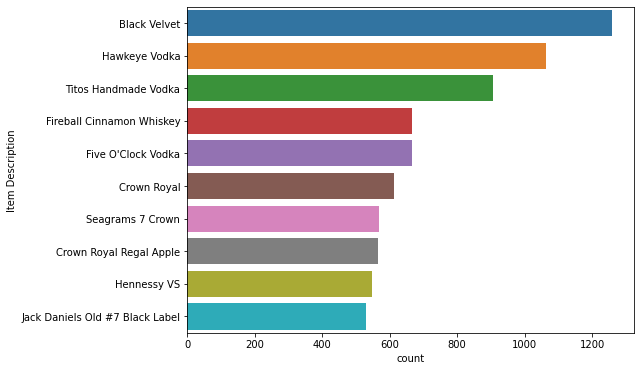

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(y='Item Description', data=df, order=df['Item Description'].value_counts().iloc[:10].index)

#### Category of liquor that sells the most

<AxesSubplot:xlabel='count', ylabel='Category Name'>

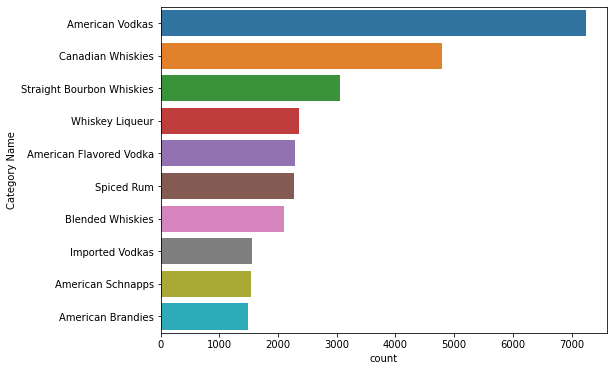

In [24]:
# High sales based on number
plt.figure(figsize=(8,6))
sns.countplot(y='Category Name', data=df, order=df['Category Name'].value_counts().iloc[:10].index)

In [25]:
# High sales based on earnings per category
df.groupby('Category Name')['Sale Dollars'].mean().sort_values(ascending = False)[0:10]

Category Name
Imported Vodka                          6252.480000
Temporary &  Specialty Packages          561.360000
Special Order Items                      548.805143
American Vodka                           464.640000
Imported Distilled Spirit Specialty      313.722174
Imported Distilled Spirits Specialty     281.820000
Temporary & Specialty Packages           267.925088
Imported Cordials & Liqueur              253.884000
American Distilled Spirits Specialty     243.000000
Imported Brandies                        229.034190
Name: Sale Dollars, dtype: float64

#### Store with highest sales of liquor

In [26]:
temp_df1 = df.groupby('Store Name', as_index=False)['Sale Dollars'].sum().sort_values('Sale Dollars', ascending=False)
temp_df1.head()

,Store Name,Sale Dollars
815,Hy-Vee #3 / BDI / Des Moines,221444.39
521,Central City 2,217412.53
919,Hy-Vee Food Store / Urbandale,99964.33
944,Hy-Vee Wine and Spirits / Iowa City,83514.77
1349,Sam's Club 6344 / Windsor Heights,75353.93


<AxesSubplot:xlabel='Sale Dollars', ylabel='Store Name'>

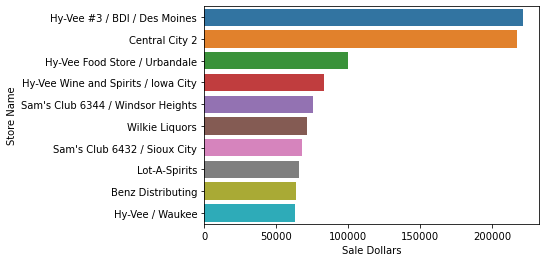

In [26]:
sns.barplot(x='Sale Dollars', y='Store Name', data=temp_df1.head(10))

#### Relation between State Bottle Cost and State Bottle Retail

<AxesSubplot:xlabel='State Bottle Cost', ylabel='State Bottle Retail'>

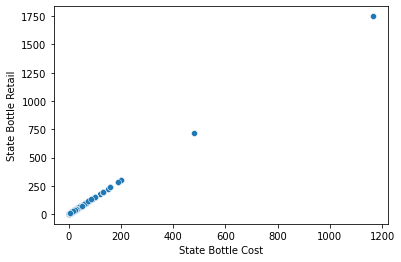

In [27]:
sns.scatterplot(x='State Bottle Cost', y= 'State Bottle Retail', data= df)

'State Bottle Cost' is having a linear relationship with 'State Bottle Retail'. A new feature 'Profit' can be derived from the 2 given features

In [28]:
df['State Retail Profit'] = df['State Bottle Retail'] - df['State Bottle Cost']
df['State Retail Profit'].describe()

count    47479.000000
mean         5.139514
std          4.759229
min          0.450000
25%          2.750000
50%          4.130000
75%          6.480000
max        583.000000
Name: State Retail Profit, dtype: float64

<AxesSubplot:xlabel='State Retail Profit'>

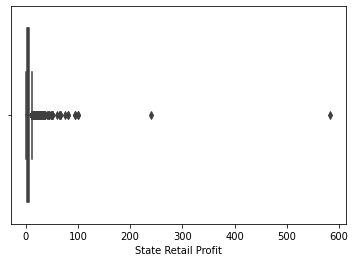

In [29]:
sns.boxplot(x= 'State Retail Profit', data=df)

Profit per item ranges from 0.45 dollars to maximum of 583 dollars. Average profit made per item is 5.13 dollars and median profit made is 4.13 dollars.

Let's find the list of items that are giving a profit of more than 100 dollars

In [30]:
df[df['State Retail Profit'] > 100][['Category Name','Item Description']]

,Category Name,Item Description
5134,Single Malt Scotch,HA Carsebridge 48YR
8351,Straight Bourbon Whiskies,HA OFC Bourbon 1993


#### Top 10 cities which show highest sales of liquor

<AxesSubplot:xlabel='count', ylabel='City'>

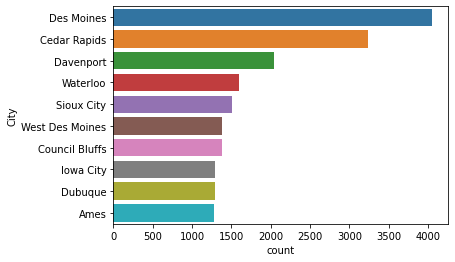

In [31]:
sns.countplot(y='City', order= df['City'].value_counts().iloc[:10].index, data=df)

In [32]:
df.groupby('City', as_index=False)['Sale Dollars'].sum().sort_values('Sale Dollars', ascending=False)[0:10]

,City,Sale Dollars
102,Des Moines,842806.47
57,Cedar Rapids,471978.54
92,Davenport,409150.22
395,Waterloo,261116.18
347,Sioux City,256199.75
84,Council Bluffs,235542.87
406,West Des Moines,230248.41
189,Iowa City,207749.91
15,Ames,176655.69
107,Dubuque,163853.66


#### Range of profit across top 10 categories

In [33]:
list_top_cat = df['Category Name'].value_counts()[0:10].index.tolist()
list_top_cat

['American Vodkas',
 'Canadian Whiskies',
 'Straight Bourbon Whiskies',
 'Whiskey Liqueur',
 'American Flavored Vodka',
 'Spiced Rum',
 'Blended Whiskies',
 'Imported Vodkas',
 'American Schnapps',
 'American Brandies']

In [34]:
temp_df2 = df[df['Category Name'].isin(list_top_cat)]
# Let's remove the 2 outliers observed earlier
temp_df2 = temp_df2[temp_df2['State Retail Profit'] < 100]

<AxesSubplot:xlabel='State Retail Profit', ylabel='Category Name'>

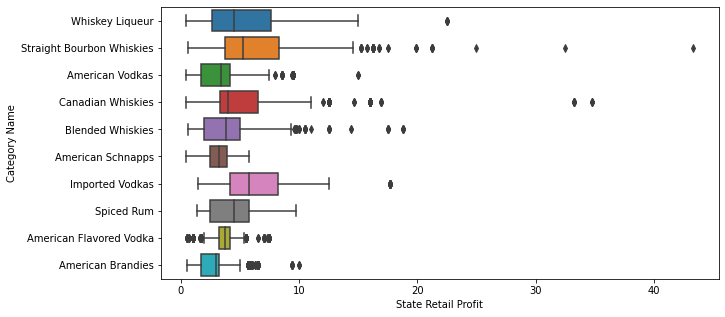

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Category Name', x = 'State Retail Profit', data=temp_df2)

If we check the median values, 'Imported Vodkas' and 'Straight Bourbon Whiskies' makes the highest profit while 'American Brandies' is making lowest profit in the top 10 categories

#### List of Vendors providing the top 10 category items

In [36]:
df[df['Category Name'].isin(list_top_cat)]['Vendor Name'].unique()

array(['SAZERAC COMPANY  INC', 'Jim Beam Brands', 'Laird & Company',
       'CONSTELLATION BRANDS INC',
       'Restless Spirits Distilling Company, LLC', 'DIAGEO AMERICAS',
       'LUXCO INC', 'McCormick Distilling Co.', 'Phillips Beverage',
       'SAZERAC NORTH AMERICA', 'MISSISSIPPI RIVER DISTIL',
       'CHATHAM IMPORTS INC', 'Heaven Hill Brands', 'E & J Gallo Winery',
       'FIFTH GENERATION INC', 'MINHAS MICRO DISTILLERY',
       'DEHNER DISTILLERY', 'BACARDI USA INC', 'Skyy Spirits Inc',
       'PERNOD RICARD USA', 'Brown Forman Corp.', 'JEM Beverage Company',
       'Infinium Spirits', 'WESTERN SPIRITS BEVERAGE',
       'Prestige Wine & Spirits Group', 'Campari America',
       'DUNKEL CORPORATION', 'CEDAR RIDGE VINEYARDS LL', 'PROXIMO',
       'Swell Liquor LLC', 'RUSSIAN STANDARD VODKA',
       'William Grant & Sons Inc', 'Foundry Distilling Company, LLC',
       'STOLI GROUP', 'Hawaii Sea Spirits LLC', 'MARSALLE COMPANY',
       'Charles Jacquin Et Cie', 'MOET HENNESSY USA

#### Volume of bottle gets sold the most

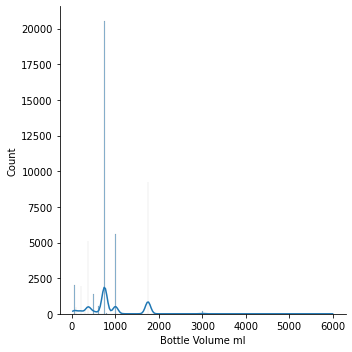

In [37]:
sns.displot(x = 'Bottle Volume ml', data=df, kind='hist', kde=True)

<AxesSubplot:xlabel='count', ylabel='Bottle Volume ml'>

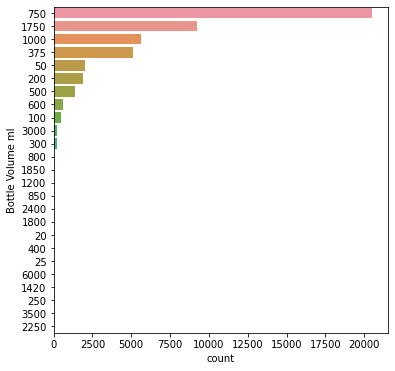

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(y='Bottle Volume ml', order=df['Bottle Volume ml'].value_counts().index ,data=df)

750ml, 1750ml and 100ml  bottles get sold the most

#### Numerical factors affecting Sales

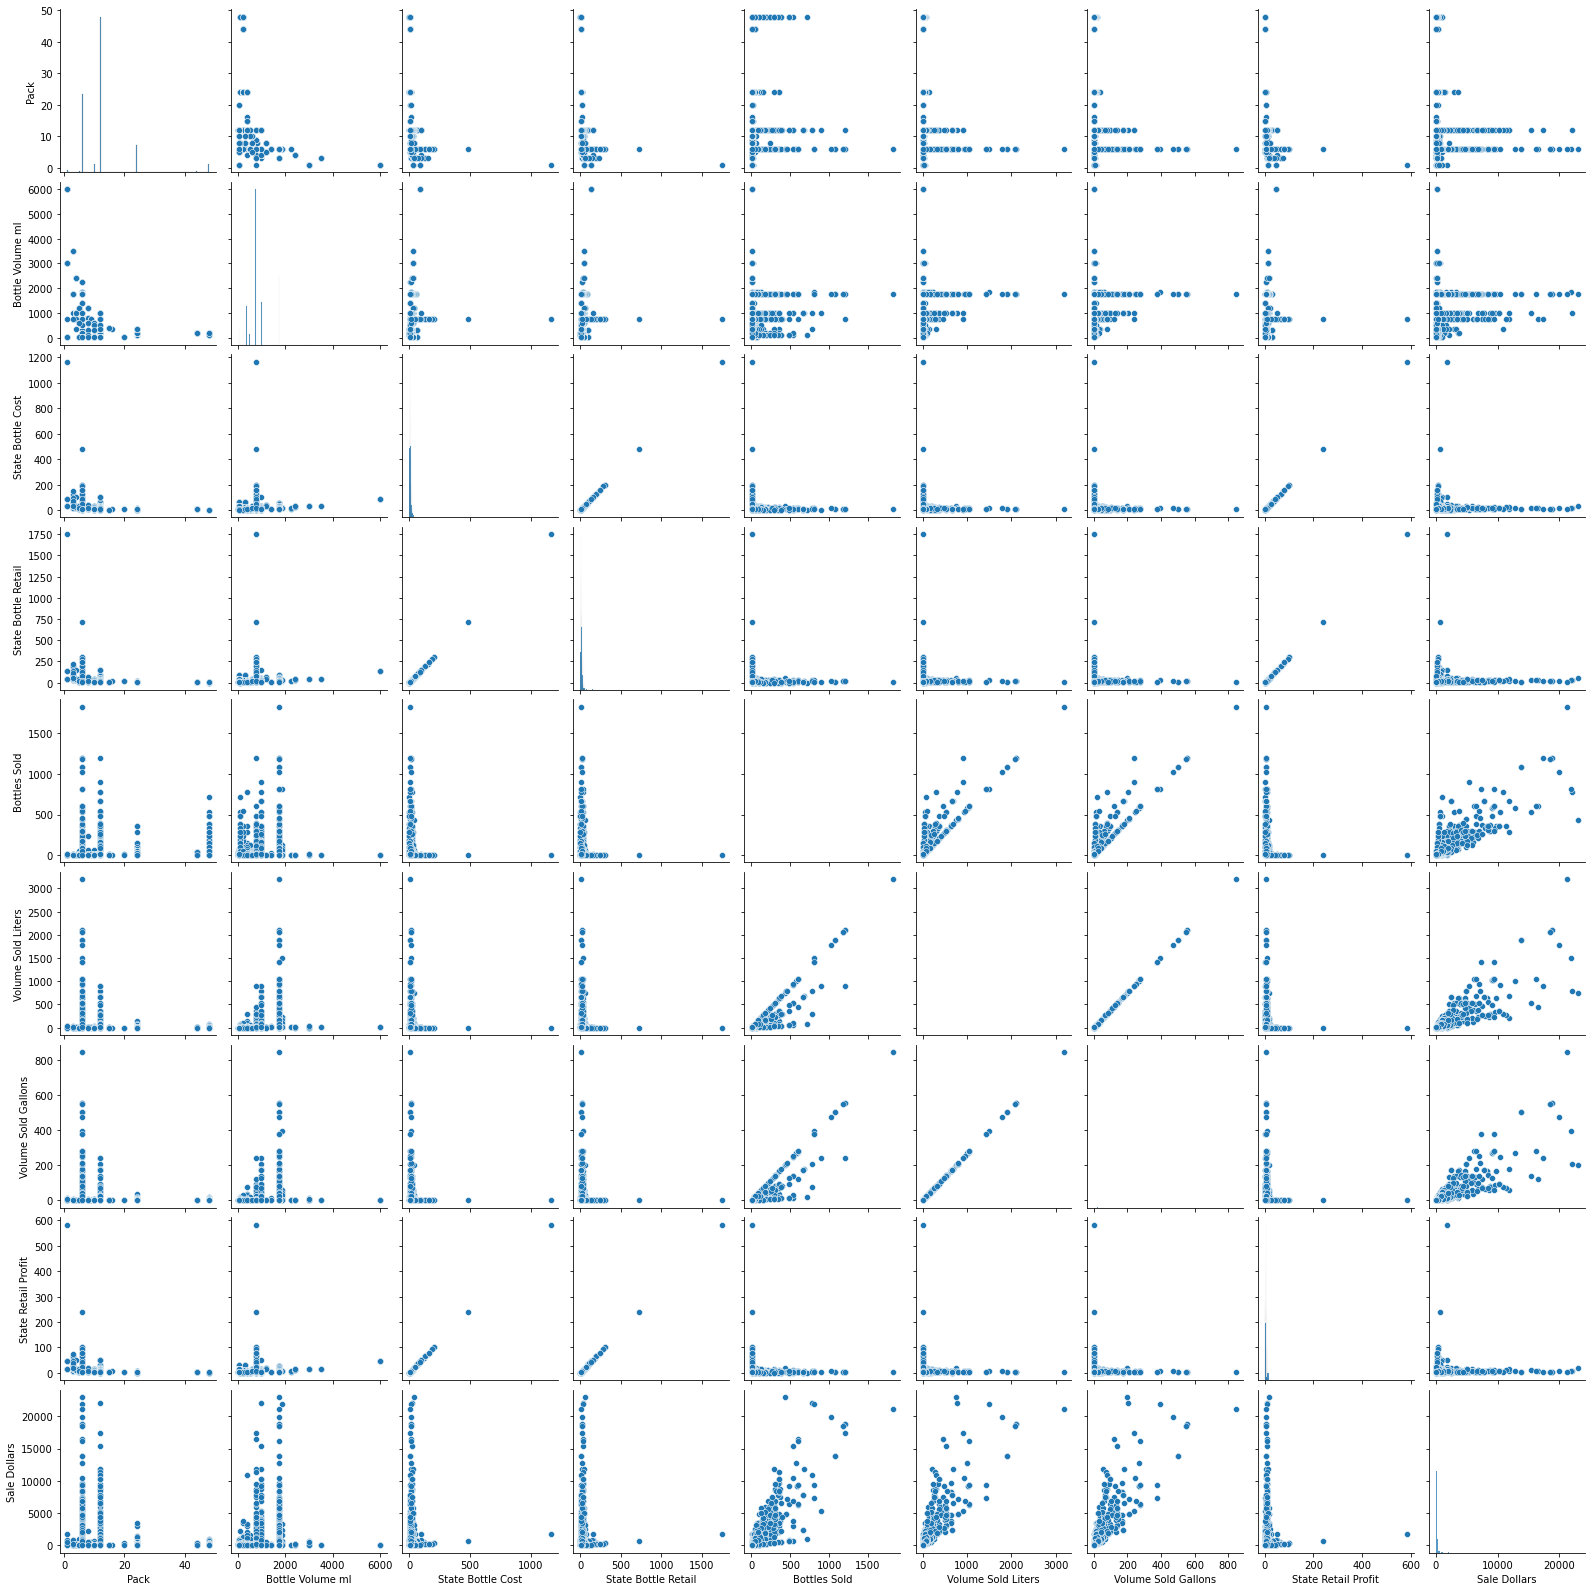

In [40]:
lst_num_fields = ['Pack', 'Bottle Volume ml', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Volume Sold Liters',
                 'Volume Sold Gallons', 'State Retail Profit', 'Sale Dollars']
sns.pairplot(df, vars = lst_num_fields)

From the above plots we see that lower 'State Bottle Retail' provides low as well as high sales ('Sales Dollars'). 

There is linear relation between the number of bottles sold and the volume sold. Higher the number of bottles sold or volume sold higher is the sale.

#### Correlation

<AxesSubplot:>

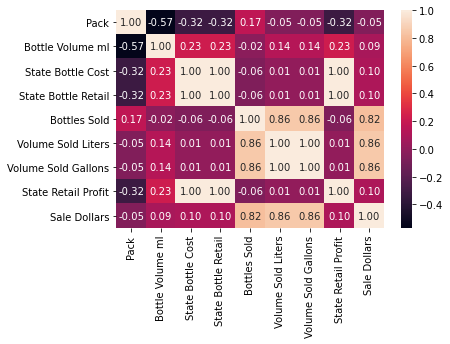

In [41]:
corr = df[lst_num_fields].corr()
sns.heatmap(corr, annot=True, fmt='.2f')

### Summary

From the above analysis we have been able to get a good understanding of the current market for liquor sales. We have identified the high selling items, high selling categories both is number as well as from the sales persepctive. We know who are the vendors who provide the top category liquors. Also, we know the what volume of liquor is sold the most.

These insights can be leveraged by stores that are not performing well to improve their sales and can also be used by a person who wants to setup a new store.

EDA : https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
https://www.edureka.co/blog/exploratory-data-analysis-in-python/#steps

### Happy Learning 